<a href="https://colab.research.google.com/github/Gazal4080/Gazal-Khan-McDonald-s_Case_Study/blob/main/ev_Market_Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [9]:
# fetching dataset - 1
df1 = pd.read_csv('/content/evdb_Jayasri.csv')
df1.head()

,Year,Month_name,Day,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,CNG ONLY,DIESEL,...,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total,PLUG-IN HYBRID EV,PURE EV,STRONG HYBRID EV,Vehicle Use type
0,2024,dec,1,2024-12-01,Gujarat,VEHICLE FITTED WITH RIG,Others,Others,0,1,...,0,0,0,0,0,1,0.0,0.0,0.0,Others
1,2024,dec,1,2024-12-01,Himachal Pradesh,AGRICULTURAL TRACTOR,Others,Others,0,158,...,0,0,0,0,0,158,0.0,0.0,0.0,Others
2,2024,dec,1,2024-12-01,Himachal Pradesh,AMBULANCE,Others,Others,0,2,...,0,0,0,0,0,5,0.0,0.0,0.0,Others
3,2024,dec,1,2024-12-01,Himachal Pradesh,BUS,Bus,Bus,0,24,...,0,0,0,0,0,25,0.0,0.0,0.0,Shared
4,2024,dec,1,2024-12-01,Himachal Pradesh,CAMPER VAN / TRAILER (PRIVATE USE),Others,Others,0,4,...,0,0,0,0,0,4,0.0,0.0,0.0,Personal


In [10]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)

DF1 Shape:  (106669, 34)


In [11]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106669 entries, 0 to 106668
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 106669 non-null  int64  
 1   Month_name           106669 non-null  object 
 2   Day                  106669 non-null  int64  
 3   Date                 106669 non-null  object 
 4   State                106669 non-null  object 
 5   Vehicle Class        106669 non-null  object 
 6   Vehicle Category     106667 non-null  object 
 7   Vehicle Type         106667 non-null  object 
 8   CNG ONLY             106669 non-null  int64  
 9   DIESEL               106669 non-null  int64  
 10  DIESEL/HYBRID        106669 non-null  int64  
 11  DI-METHYL ETHER      106669 non-null  int64  
 12  DUAL DIESEL/BIO CNG  106669 non-null  int64  
 13  DUAL DIESEL/CNG      106669 non-null  int64 

Observation: Uttarpradesh, Tamilnadu, Maharashtra and Karnataka are among the top states with the majority of EV while Bihar , Sikkim, Ladakh with the least.

<ipython-input-12-c4cf94a26310>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ELECTRIC(BOV)', y='State', data=evs_per_state, palette='viridis')


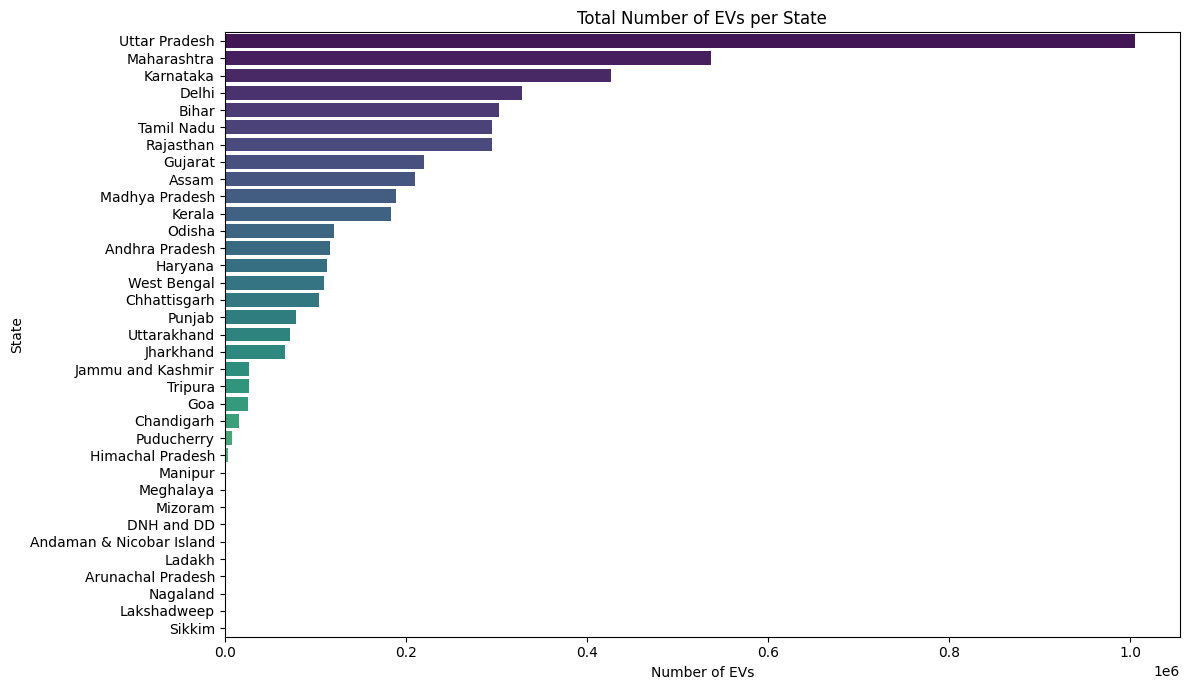

In [12]:

# Assuming df1 is your DataFrame
# Calculate total EVs per state
evs_per_state = df1.groupby('State')['ELECTRIC(BOV)'].sum().reset_index()
evs_per_state = evs_per_state.sort_values(by='ELECTRIC(BOV)', ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x='ELECTRIC(BOV)', y='State', data=evs_per_state, palette='viridis')
plt.title('Total Number of EVs per State')
plt.xlabel('Number of EVs')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [13]:
ev_models_brandwise = df1.groupby('Vehicle Class').size().reset_index(name='Model_Count')

# Step 4: Sort and get the top brands
ev_models_brandwise = ev_models_brandwise.sort_values(by='Model_Count', ascending=False)

# Step 5: Display
print(ev_models_brandwise)

                       Vehicle Class  Model_Count
31                   M-CYCLE/SCOOTER         4605
40                         MOTOR CAR         4558
26                     GOODS CARRIER         4504
39                         MOTOR CAB         4362
61         THREE WHEELER (PASSENGER)         4200
..                               ...          ...
44  MOTOR CYCLE/SCOOTER-WITH TRAILER           11
41                     MOTOR CARAVAN            6
57                        SCHOOL BUS            5
37         MODULAR HYDRAULIC TRAILER            3
52                    PULLER TRACTOR            2

[75 rows x 2 columns]


<ipython-input-14-bba9664b89e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df1, x='Vehicle Class', kind='count', palette='viridis', height=6, aspect=2)


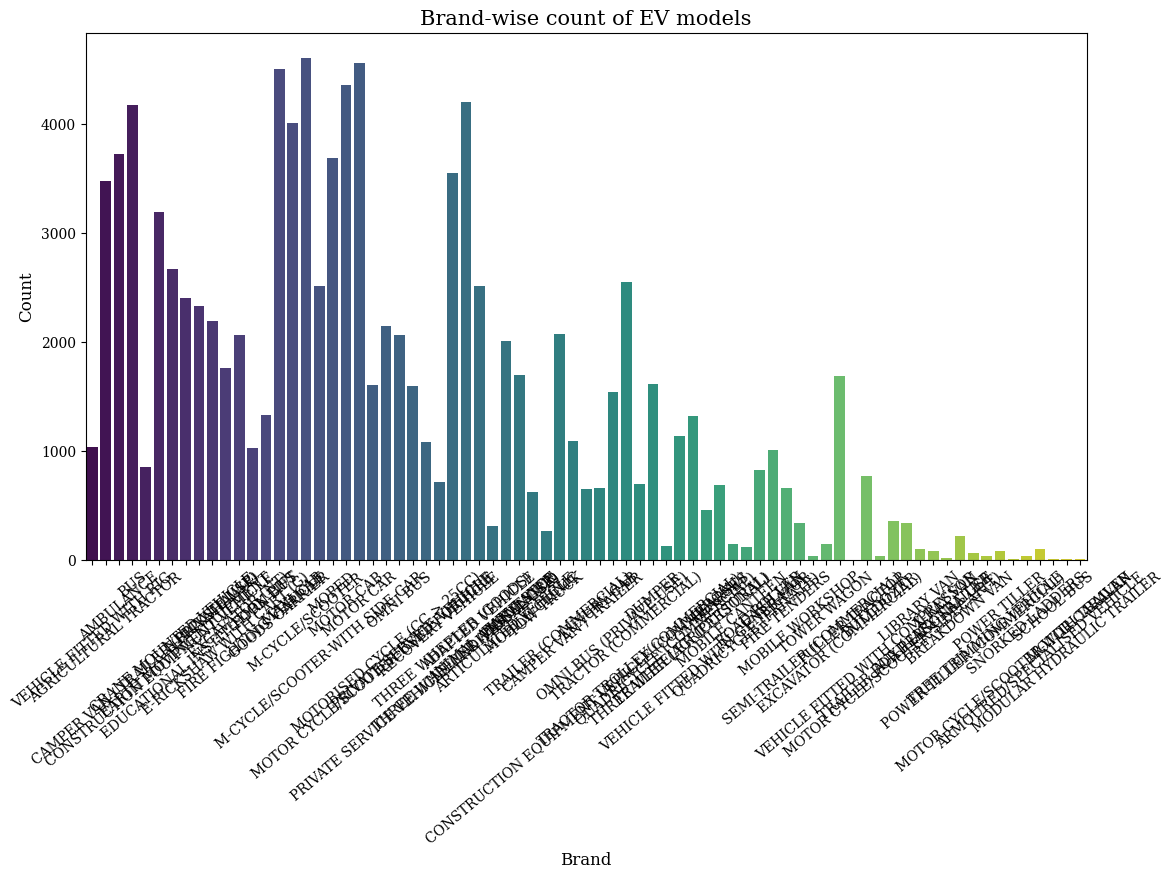

In [14]:
# brand-wise count of EV models
sns.catplot(data=df1, x='Vehicle Class', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise count of EV models', family='serif', size=15)
plt.show()

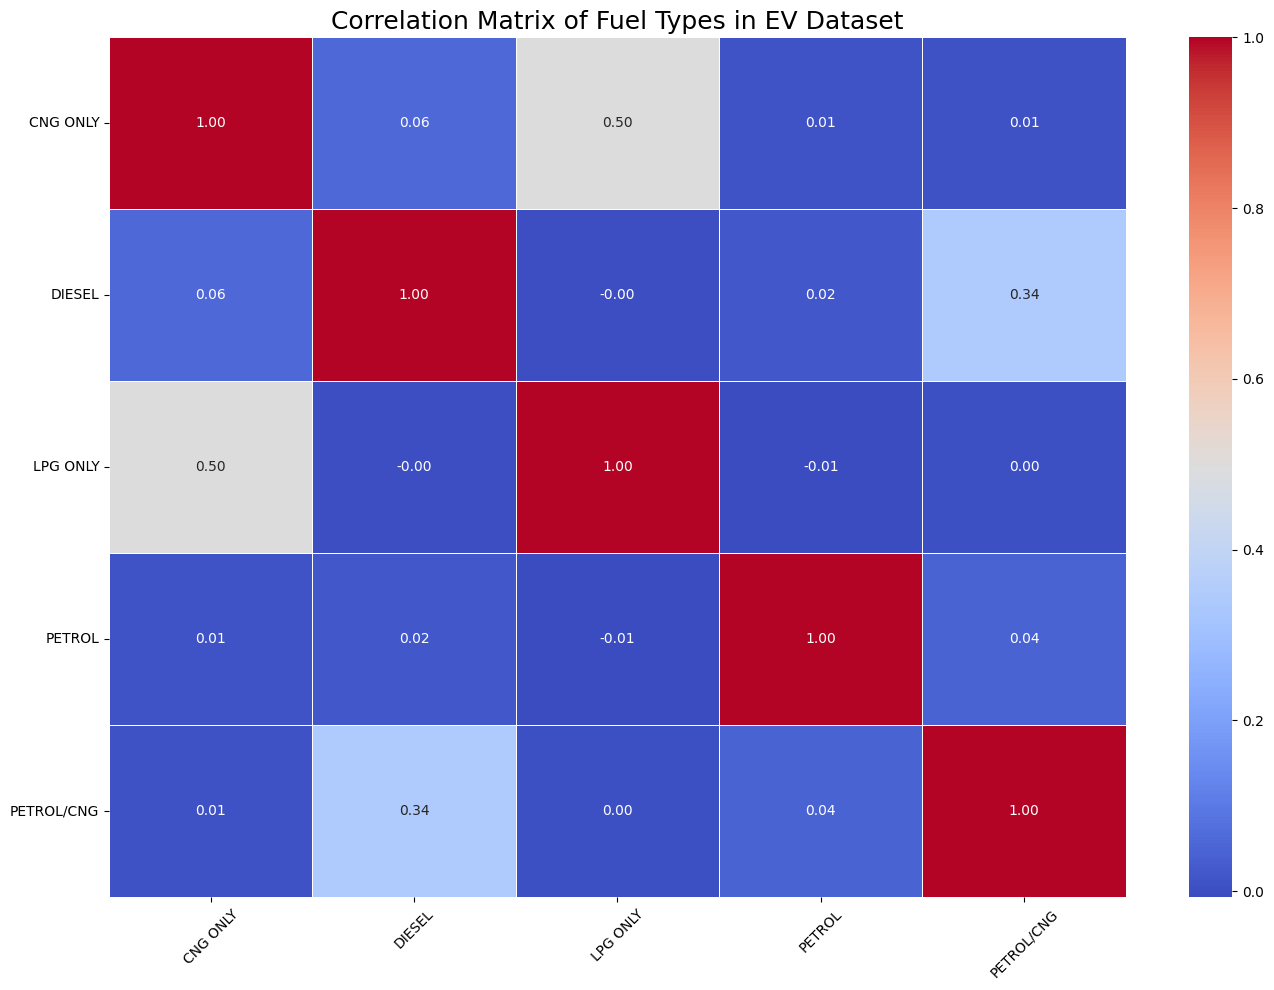

In [15]:

# plotting the correlation matrix from dataset 1
numerical_cols = ['CNG ONLY', 'DIESEL', 'DIESEL/HY', 'DI-METHY',
                  'DUAL DIES', 'DUAL DIES', 'DUAL DIES', 'ELECTRIC',
                  'HEAVY DUTY ELECTRIC', 'HYBRID', 'LPG ONLY', 'PETROL', 'PETROL/CNG']

# Make sure only the columns that exist in data are selected
numerical_cols = [col for col in numerical_cols if col in df1.columns]

numerical_data = df1[numerical_cols]

# Step 3: Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Step 4: Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Fuel Types in EV Dataset', fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
# Step 3: Handle missing values (if any)
numerical_cols = ['CNG ONLY', 'DIESEL', 'DIESEL/HY', 'DI-METHY',
                  'DUAL DIES', 'DUAL DIES', 'DUAL DIES', 'ELECTRIC',
                  'HEAVY DUTY ELECTRIC', 'HYBRID', 'LPG ONLY', 'PETROL', 'PETROL/CNG']

# Make sure only the columns that exist in data are selected
numerical_cols = [col for col in numerical_cols if col in df1.columns]

numerical_data = df1[numerical_cols]
numerical_data = numerical_data.fillna(0)
numerical_data


,CNG ONLY,DIESEL,LPG ONLY,PETROL,PETROL/CNG
0,0,1,0,0,0
1,0,158,0,0,0
2,0,2,0,3,0
3,0,24,0,1,0
4,0,4,0,0,0
...,...,...,...,...,...
106664,5,0,0,2610,0
106665,0,0,0,1,0
106666,0,0,0,3,0
106667,0,7,0,129,38


In [18]:
# Step 4: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)


In [19]:

# Step 5: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change number of clusters
kmeans.fit(scaled_data)



KMeans(n_clusters=3, random_state=42)

In [20]:
# Add cluster labels to original data
df1['Cluster'] = kmeans.labels_



In [21]:
# Step 6: Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)



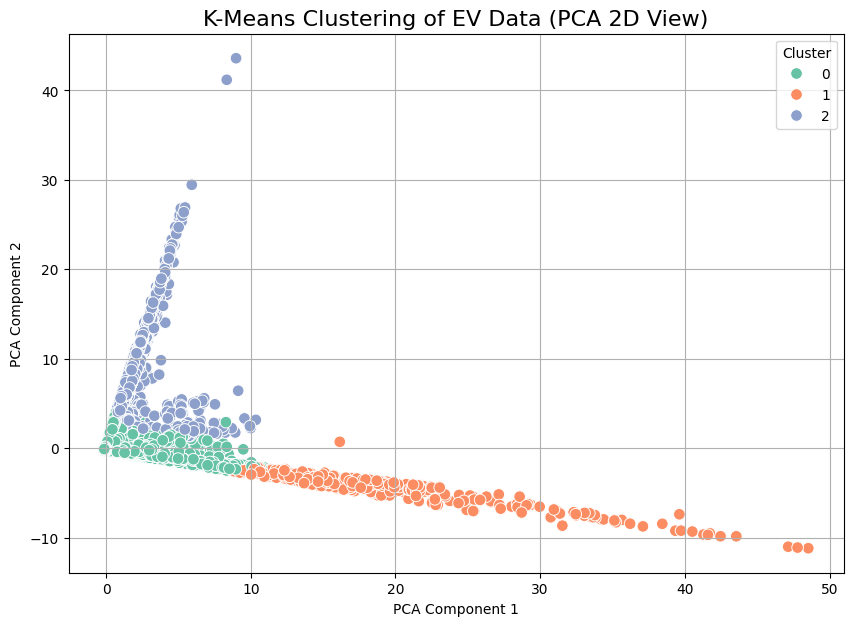

In [22]:
# Step 7: Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df1['Cluster'], palette='Set2', s=70)
plt.title('K-Means Clustering of EV Data (PCA 2D View)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()